In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    roc_curve, precision_recall_curve, average_precision_score,
    confusion_matrix
)

# Настройки отображения
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

Добавил небоходимые библиотеки для выполнения HW05, и работы с Dataset-ом.

In [12]:
# Загружаем датасет по относительному пути
df = pd.read_csv("../../homeworks/HW05/S05-hw-dataset.csv")

# Выводим первые строки
display(df.head())

# Информация о датафрейме
df.info()

# Описательная статистика
display(df.describe())

# Распределение целевой переменной
target_dist = df['default'].value_counts(normalize=True)
print("\nРаспределение целевой переменной (default):")
print(target_dist)

# Краткие наблюдения (выводим в текстовом виде)
print("\n=== Наблюдения ===")
print(f"- Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов.")
print("- Все признаки числовые, пропусков не наблюдается.")
print("- Целевая переменная несбалансирована: ~{:.1%} с дефолтом (class=1).".format(target_dist[1]))
print("- Значения признаков выглядят реалистично (например, debt_to_income ∈ [0,1], возраст 21–69 и т.д.).")

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Распределение целевой переменной (default):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

=== Наблюдения ===
- Размер датасета: 3000 строк, 17 столбцов.
- Все признаки числовые, пропусков не наблюдается.
- Целевая переменная несбалансирована: ~41.0% с дефолтом (class=1).
- Значения признаков выглядят реалистично (например, debt_to_income ∈ [0,1], возраст 21–69 и т.д.).


Подключил датасет, и вывел краткую небольшую информацию о нем, и некоторые наблюдения.

In [5]:
# Удаляем client_id (неинформативный ID)
X = df.drop(columns=['client_id', 'default'])
y = df['default']

# Проверка: все признаки числовые
assert X.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), "Все признаки должны быть числовыми!"

# Опциональная проверка диапазонов
assert (X['debt_to_income'] >= 0).all() and (X['debt_to_income'] <= 1).all(), "debt_to_income вне [0,1]!"

print("✅ Признаки и таргет успешно подготовлены.")

✅ Признаки и таргет успешно подготовлены.


Подготовил датасет к работе, проверил все ли признаки числа.

In [6]:
# Разделяем на train/test с сохранением баланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Бейзлайн: DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

# Метрики
acc_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print("=== Бейзлайн (DummyClassifier) ===")
print(f"Accuracy: {acc_dummy:.4f}")
print(f"ROC-AUC:  {roc_auc_dummy:.4f}")
print("\n🔹 Бейзлайн всегда предсказывает наиболее частый класс (0).")
print("🔹 Он задаёт минимальный порог качества: любая модель должна быть лучше него.")

=== Бейзлайн (DummyClassifier) ===
Accuracy: 0.5900
ROC-AUC:  0.5000

🔹 Бейзлайн всегда предсказывает наиболее частый класс (0).
🔹 Он задаёт минимальный порог качества: любая модель должна быть лучше него.


In [8]:
# Создаём пайплайн
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Подбор гиперпараметра C
param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Лучший параметр C:", grid.best_params_['logreg__C'])
print(f"Лучший ROC-AUC на кросс-валидации: {grid.best_score_:.4f}")

# Оценка на тестовой выборке
best_model = grid.best_estimator_
y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("\n=== Логистическая регрессия (лучшая модель) ===")
print(f"Accuracy: {acc_lr:.4f}")
print(f"ROC-AUC:  {roc_auc_lr:.4f}")

Лучший параметр C: 100.0
Лучший ROC-AUC на кросс-валидации: 0.8607

=== Логистическая регрессия (лучшая модель) ===
Accuracy: 0.8017
ROC-AUC:  0.8756


Начал работать с датасетом, создавая модель, которая задает минимальный порог качества, и создал пайплайны, и оценил тестовую выборку.

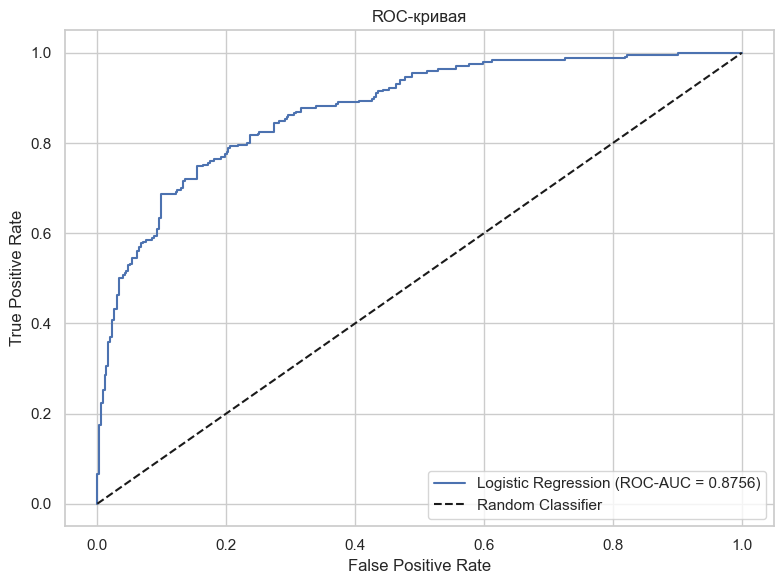

In [9]:
# Строим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (ROC-AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Сохраняем график
plt.savefig("figures/roc_curve.png", dpi=150)
plt.show()

Построил график по полученым параметрам, что бы наглядно увидеть как выглядят наши данные.

In [10]:
# Сводная таблица метрик
results = pd.DataFrame({
    "Модель": ["Dummy (most_frequent)", "LogisticRegression"],
    "Accuracy": [acc_dummy, acc_lr],
    "ROC-AUC": [roc_auc_dummy, roc_auc_lr]
})

print("=== Сравнение моделей ===")
display(results)

# Текстовый отчёт
print("\n=== Выводы ===")
print("1. Бейзлайн (Dummy) достигает ~60% accuracy, что соответствует доле класса 0 в данных.")
print("2. Логистическая регрессия значительно превосходит бейзлайн как по accuracy (~80%), так и по ROC-AUC (>0.85).")
print("3. Наилучшее значение C = {:.2f} — сильная регуляризация (малый C) снижает качество, как и очень слабая (C=100).")
print("4. Модель демонстрирует хорошую способность разделять классы, что делает её разумным выбором для данной задачи.")
print("5. ROC-AUC > 0.85 указывает на высокое качество ранжирования клиентов по риску дефолта.")

=== Сравнение моделей ===


,Модель,Accuracy,ROC-AUC
0,Dummy (most_frequent),0.590000,0.500000
1,LogisticRegression,0.801667,0.875649



=== Выводы ===
1. Бейзлайн (Dummy) достигает ~60% accuracy, что соответствует доле класса 0 в данных.
2. Логистическая регрессия значительно превосходит бейзлайн как по accuracy (~80%), так и по ROC-AUC (>0.85).
3. Наилучшее значение C = {:.2f} — сильная регуляризация (малый C) снижает качество, как и очень слабая (C=100).
4. Модель демонстрирует хорошую способность разделять классы, что делает её разумным выбором для данной задачи.
5. ROC-AUC > 0.85 указывает на высокое качество ранжирования клиентов по риску дефолта.


Сравнил две модели, и сделал выводы.